In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Dataset
df = pd.read_csv("twitch_small_streamers.csv")

In [3]:
# Initial Data Inspection
print("\n🔍 First 5 Rows of the Dataset:")
display(df.head())

print("\n🔍 Dataset Info:")
df.info()

print("\n🔍 Summary Statistics:")
display(df.describe())


🔍 First 5 Rows of the Dataset:


,streamer_name,game,viewers,start_time,user_login,stream_id,language,title,tags,duration,total_game_viewers,active_streams,avg_viewers_per_game
0,taybisox,Just Chatting,72,2025-03-20T16:10:23Z,taybisox,319354193149,ru,"ДОБРЫЙ АУК НА ФИЛЬМ/ANIME (без правил, 1 прави...","Русский, девушка, общение, girl, Cosplay, аним...",195.0,55380,2366,23.406593
1,小熙肉絲,Just Chatting,99,2025-03-20T17:47:15Z,sophroseeeeee,315130774264,zh,3/21 救命 圍巾批發,"中文, 奶茶千杯不醉, 香水收藏家, kpop, 年度熬夜亞軍, 儀式感",98.0,55380,2366,23.406593
2,Felikah,Just Chatting,97,2025-03-20T18:47:30Z,felikah,318151777788,de,🔴 PUMMEL PARTY ACTION 🔴 ELDEN RING 🔴 GODRICK D...,"Deutsch, gaming, GHG, 7tv",38.0,55380,2366,23.406593
3,GetOnMyLvLTV,Just Chatting,96,2025-03-19T12:06:37Z,getonmylvltv,317412970361,de,24.07.2020 - Numero Uno | 24/7 alte Streams & ...,Deutsch,1879.0,55380,2366,23.406593
4,LaserLent,Just Chatting,100,2025-03-20T17:31:13Z,laserlent,318146482172,es,"DALAS se VUELVE TOTALMETE LOCO, FRANK CUESTA E...","Español, videojuegos, videojuegos, actualidad",114.0,55380,2366,23.406593



🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16809 entries, 0 to 16808
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   streamer_name         16809 non-null  object 
 1   game                  16809 non-null  object 
 2   viewers               16809 non-null  int64  
 3   start_time            16809 non-null  object 
 4   user_login            16809 non-null  object 
 5   stream_id             16809 non-null  int64  
 6   language              16809 non-null  object 
 7   title                 16795 non-null  object 
 8   tags                  16792 non-null  object 
 9   duration              16809 non-null  float64
 10  total_game_viewers    16809 non-null  int64  
 11  active_streams        16809 non-null  int64  
 12  avg_viewers_per_game  16809 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.7+ MB

🔍 Summary Statistics:


,viewers,stream_id,duration,total_game_viewers,active_streams,avg_viewers_per_game
count,16809.000000,1.680900e+04,16809.000000,16809.000000,16809.000000,16809.000000
mean,19.081920,3.179256e+11,176.138497,19185.677911,969.014754,19.081920
std,19.588545,1.446964e+09,256.667686,15966.576374,667.600826,3.505511
min,5.000000,3.141780e+11,0.000000,14.000000,1.000000,11.666667
25%,6.000000,3.174714e+11,57.000000,8031.000000,466.000000,15.648256
50%,11.000000,3.181479e+11,113.000000,15803.000000,792.000000,19.098485
75%,23.000000,3.193519e+11,202.000000,20050.000000,1145.000000,22.696078
max,100.000000,3.193664e+11,2876.000000,55380.000000,2366.000000,38.358491


In [4]:
# Check for Missing Values
print("\n🔍 Missing Values per Column:")
print(df.isnull().sum())


🔍 Missing Values per Column:
streamer_name            0
game                     0
viewers                  0
start_time               0
user_login               0
stream_id                0
language                 0
title                   14
tags                    17
duration                 0
total_game_viewers       0
active_streams           0
avg_viewers_per_game     0
dtype: int64


In [5]:
# Handle Missing Values
df = df.dropna()
print("✅ Missing values dropped!")

✅ Missing values dropped!


In [6]:
# Check for Missing Values
print("\n🔍 Missing Values per Column:")
print(df.isnull().sum())


🔍 Missing Values per Column:
streamer_name           0
game                    0
viewers                 0
start_time              0
user_login              0
stream_id               0
language                0
title                   0
tags                    0
duration                0
total_game_viewers      0
active_streams          0
avg_viewers_per_game    0
dtype: int64


In [7]:
# Check for Duplicates
duplicate_rows = df[df.duplicated(subset=['stream_id'])]
print(f"\n🔍 Total Duplicate Rows Found (by stream_id): {len(duplicate_rows)}")

if len(duplicate_rows) > 0:
    df = df.drop_duplicates(subset=['stream_id'])
    print("✅ Duplicates Removed (based on stream_id)!")


🔍 Total Duplicate Rows Found (by stream_id): 3015
✅ Duplicates Removed (based on stream_id)!


In [8]:
# Convert 'start_time' to Datetime Format
df['start_time'] = pd.to_datetime(df['start_time'])
print("✅ Converted 'start_time' to datetime format!")

✅ Converted 'start_time' to datetime format!



🔍 Checking for Outliers in 'duration':


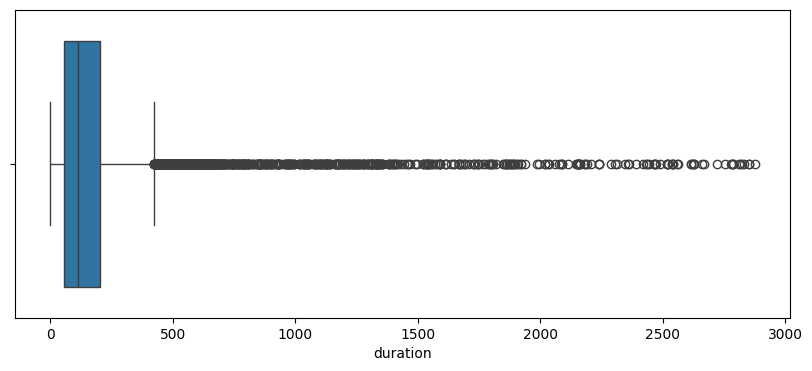


🔍 Checking for Outliers in 'avg_viewers_per_game':


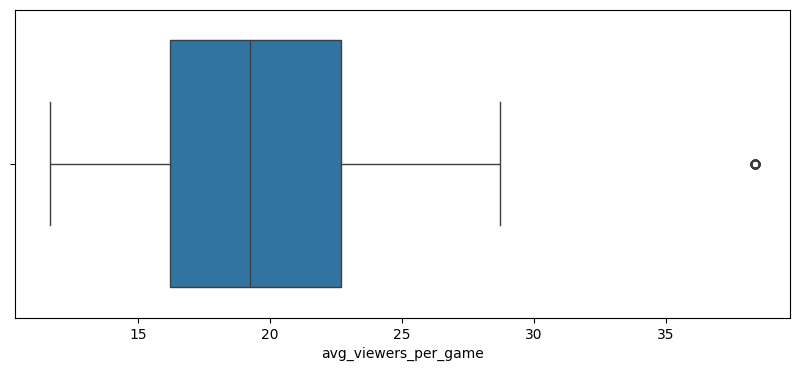

In [9]:
# Validate Key Metrics
# Ensure 'duration' and 'avg_viewers_per_game' are reasonable
print("\n🔍 Checking for Outliers in 'duration':")
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['duration'])
plt.show()

print("\n🔍 Checking for Outliers in 'avg_viewers_per_game':")
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['avg_viewers_per_game'])
plt.show()


In [10]:
# Remove Long Streams (Over 24 Hours)
initial_count = len(df)
df = df[df['duration'] <= 1440]  # Keep only streams <= 24 hours (1440 minutes)
removed_count = initial_count - len(df)
print(f"\n✅ Removed {removed_count} streams exceeding 24 hours.")


✅ Removed 147 streams exceeding 24 hours.


In [11]:
# Standardize Text Fields (Languages, Tags)
df['language'] = df['language'].str.lower()
df['tags'] = df['tags'].str.lower()

In [12]:
# Save Final Cleaned Dataset and Display Final Shape
df.to_csv("twitch_cleaned_data.csv", index=False)
print("\n✅ Data Cleaning Completed! Cleaned data saved as 'twitch_cleaned_data.csv'.")

# Display final dataset shape
print(f"\n📊 Final Dataset Shape: {df.shape[0]} rows, {df.shape[1]} columns")
display(df.head())



✅ Data Cleaning Completed! Cleaned data saved as 'twitch_cleaned_data.csv'.

📊 Final Dataset Shape: 13616 rows, 13 columns


,streamer_name,game,viewers,start_time,user_login,stream_id,language,title,tags,duration,total_game_viewers,active_streams,avg_viewers_per_game
0,taybisox,Just Chatting,72,2025-03-20 16:10:23+00:00,taybisox,319354193149,ru,"ДОБРЫЙ АУК НА ФИЛЬМ/ANIME (без правил, 1 прави...","русский, девушка, общение, girl, cosplay, аним...",195.0,55380,2366,23.406593
1,小熙肉絲,Just Chatting,99,2025-03-20 17:47:15+00:00,sophroseeeeee,315130774264,zh,3/21 救命 圍巾批發,"中文, 奶茶千杯不醉, 香水收藏家, kpop, 年度熬夜亞軍, 儀式感",98.0,55380,2366,23.406593
2,Felikah,Just Chatting,97,2025-03-20 18:47:30+00:00,felikah,318151777788,de,🔴 PUMMEL PARTY ACTION 🔴 ELDEN RING 🔴 GODRICK D...,"deutsch, gaming, ghg, 7tv",38.0,55380,2366,23.406593
4,LaserLent,Just Chatting,100,2025-03-20 17:31:13+00:00,laserlent,318146482172,es,"DALAS se VUELVE TOTALMETE LOCO, FRANK CUESTA E...","español, videojuegos, videojuegos, actualidad",114.0,55380,2366,23.406593
5,kitnip_,Just Chatting,100,2025-03-20 17:16:08+00:00,kitnip_,317471611385,en,first ever IRL strim | !kofi !socials,"girl, english, swedish, chatty",129.0,55380,2366,23.406593
